# <span style="font-family: 'Times New Roman', Times, serif; font-size: 24px;">**What is an Imbalanced data, and what are the techniques to handle imbalanced datasets?**</span>

## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**Abstract:**</span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">Imbalanced datasets often lead to biased models that prioritize the majority class, resulting in poor performance on the minority class. The study investigates various strategies to mitigate this issue, including resampling methods, algorithm-level adjustments, and evaluation metrics tailored for imbalanced data.</span>



## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**Introduction:**</span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">In machine learning, imbalanced datasets occur when one class significantly outnumbers the others. This poses challenges as traditional algorithms are biased towards the majority class and may overlook the minority class. This issue is prevalent in areas like fraud detection and medical diagnosis, where rare events or diseases occur infrequently. Handling imbalanced datasets is crucial to ensure accurate predictions and detection of important but infrequent anomalies.<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**The importance of handling imbalanced datasets:**</span><br>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Addressing imbalanced datasets is     crucial for improving model performance<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; By mitigating biases, we can better detect rare events and achieve more balanced predictions<br>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Challenges of imbalanced datasets:**</span><br>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Traditional machine learning algorithms are biased towards the majority class Traditional machine learning algorithms are biased towards the majority class<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; They focus on accurately predicting the majority class while neglecting the minority class<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; This can result in suboptimal model performance and the inability to detect important but infrequent events or anomalies
    

## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**Why is it Interesting?**</span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">Handling unbalanced datasets is critical because real-world data is frequently skewed, and typical machine learning algorithms prefer the majority class. If this issue is not addressed, models with high accuracy but low predictive performance on the minority class would be result. Effective strategies for dealing with imbalanced data can lead to more equitable and dependable models, which can be applied in a variety of sectors.
The problem of imbalanced datasets is compounded by standard machine learning algorithms' bias towards the majority class. Because they are motivated by accuracy, these algorithms excel at properly identifying the majority class while frequently misclassifying or disregarding cases from the minority class. As a result, while overall accuracy looks to be excellent, predictability on the minority class diminishes.</span>


## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**There are several methods to handle Imbalanced Dataset:**</span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">1. Random OverSampling <br>2. Synthetic Minority Over-sampling Technique (SMOTE) <br>3. Random Undersampling<br>4. Adaptive Synthetic Sampling (ADASYN)</span>

In [125]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN

## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**About the Dataset:**</span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">The dataset contains transactions made by credit cards in September 2013 by European cardholders.<br>
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.<br>
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.</span>

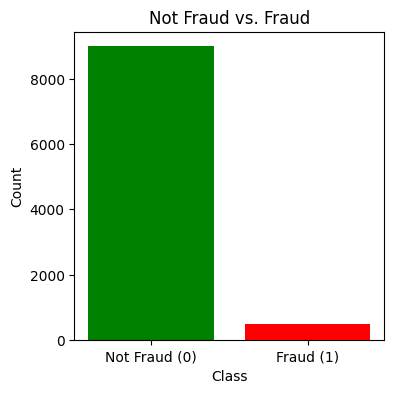

In [126]:
# Loading credit card fraud detection dataset
data = pd.read_csv("C:\\Users\\hp\\Downloads\\credit-card.csv")
# Calculate the value counts
valuecount = data['Class'].value_counts()
# Create a bar plot
plt.figure(figsize=(4, 4))
plt.bar(valuecount.index, valuecount.values, color=['green', 'red'])
plt.xticks(valuecount.index, ['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Not Fraud vs. Fraud')
plt.show()
# Splitting the data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [134]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">The provided code defines a Python function called random_forest. This function initializes and trains a Random Forest classifier using the given training data and then evaluates its performance on a test dataset. It calculates accuracy, generates a detailed classification report, and creates a heatmap visualization of the confusion matrix. The confusion matrix visually represents true positives, false positives, true negatives, and false negatives. The function returns the accuracy score, classification report, and confusion matrix, making it a convenient tool for assessing the Random Forest classifier's performance.</span>

In [135]:
# Define a function to train and evaluate a Random Forest classifier
def random_forest(X_train, y_train, X_test, y_test):
    # Initialize a Random Forest classifier
    init = RandomForestClassifier(random_state=42)

    # Fit the classifier on the training data
    init.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = init.predict(X_test)
    
     # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    # Visualising confusion matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()
    return accuracy, report,cm


Original Data:


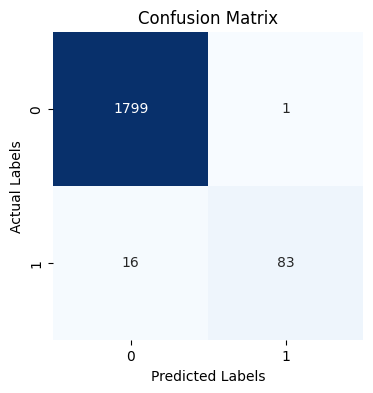

Accuracy: 0.9910479199578726
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1800
           1       0.99      0.84      0.91        99

    accuracy                           0.99      1899
   macro avg       0.99      0.92      0.95      1899
weighted avg       0.99      0.99      0.99      1899



In [136]:
# Original Data
print("Original Data:")
accuracy, report,cm = random_forest(X_train, y_train, X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">The provided classification report for the original data shows a very high accuracy of approximately 99.10%.One significant factor contributing to the high accuracy is class imbalance. When a dataset is imbalanced, and the majority class is much larger than the minority class, classifiers tend to predict the majority class more frequently. In this case, the classifier predicts "0" with high accuracy due to its prevalence for these reasons one must always look at two important metrics Precision and Recall.<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Precision:**<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; It is a measure of the accuracy of positive predictions made by the model. It answers the question: "Of all the instances predicted as positive, how many were correctly predicted?"<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; In this report, a precision of 0.99 for class "1" means that when the model predicts a positive case, it is correct approximately 99% of the time.<br></span>
    
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Recall:**</span> <br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; It is also known as sensitivity or true positive rate, measures the model's ability to identify all positive instances correctly.<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; It answers the question: "Of all the actual positive instances, how many were correctly predicted by the model?"A high recall indicates that the model is good at capturing most of the positive cases, even if it results in some false positives.<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; In this report, a recall of 0.84 for class "1" means that the model correctly identifies approximately 84% of the actual fraud cases.</span>


## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**Random Oversampling:**</span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; In Random Oversampling, existing samples from the minority class are randomly selected and duplicated multiple times. This effectively inflates the representation of the minority class in the dataset, making it closer in size to the majority class.<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Random Oversampling can have a positive impact on machine learning model performance, particularly when the minority class contains critical information or represents rare events. However, it is important to be cautious about potential overfitting, as the model might become too specialized in the minority class. </span>

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Hgy61fKGaf98qz-rTBDtxQ.png" alt="Random Oversampling" width="500" height="150"><br>
<br>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Advantages:**<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Improved Model Performance<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Compatibility with Various Algorithms<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Preservation of Information<br>
    <br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Disadvantages:**<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Overfitting<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Potential for Model Biases<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Loss of Variability<br>


Random Oversampling:


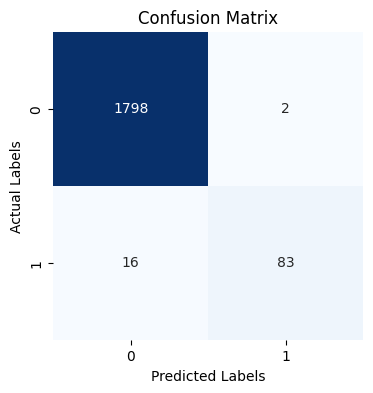

Accuracy: 0.990521327014218
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1800
           1       0.98      0.84      0.90        99

    accuracy                           0.99      1899
   macro avg       0.98      0.92      0.95      1899
weighted avg       0.99      0.99      0.99      1899



In [138]:
# Random oversampling
print("\nRandom Oversampling:")
random_os = RandomOverSampler(random_state=42)
X_resampled, y_resampled = random_os.fit_resample(X_train, y_train)
accuracy, report,cm = random_forest(X_resampled, y_resampled, X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**Synthetic Minority Over-sampling Technique (SMOTE):**</span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; SMOTE generates synthetic examples of the minority class by interpolating between existing minority class instances. It does this by selecting a pair of similar instances and creating new instances along the line connecting them in the feature space. This effectively increases the representation of the minority class.<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; SMOTE can lead to improved model performance, especially in scenarios where the minority class contains critical information. By creating synthetic instances, SMOTE helps the model learn a more robust decision boundary, reducing the risk of overfitting to the minority class. </span>

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*MaZhmNw4iqK4M086.png" alt="SMOTE.png" width="500" height="150"><br>
<br>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Advantages:**<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Improved Model Performance<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Reduced Bias<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Prevention of Overfitting<br>
    <br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Disadvantages:**<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Increased Computational Complexity<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Difficulty with Multiclass Problems<br>




SMOTE:


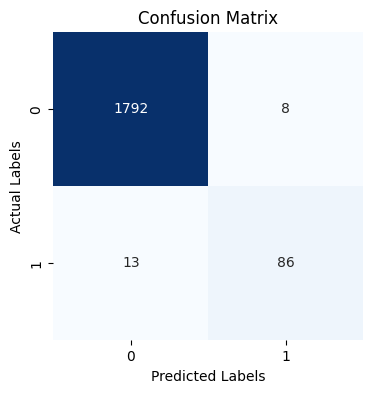

Accuracy: 0.9889415481832543
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1800
           1       0.91      0.87      0.89        99

    accuracy                           0.99      1899
   macro avg       0.95      0.93      0.94      1899
weighted avg       0.99      0.99      0.99      1899



In [131]:
# Synthetic Minority Over-sampling Technique (SMOTE)
print("\nSMOTE:")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
accuracy, report,cm = random_forest(X_resampled, y_resampled, X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**Random Undersampling:**</span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; In Random Undersampling, a random subset of instances from the majority class is selected and removed from the dataset. This reduction in the majority class instances helps balance the class distribution, bringing it closer to that of the minority class.<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; While Random Undersampling can help improve model performance in imbalanced datasets by reducing the dominance of the majority class, it may result in a loss of valuable information. Removing instances from the majority class could lead to underfitting or the loss of important patterns in the data.</span>

<img src="https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/How-to-Deal-With-Imbalanced-Classification-and-Regression-Data_7.png?resize=775%2C402&ssl=1" alt="Random Undersampling.png" width="500" height="150"><br>
<br>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Advantages:**<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Improved Model Performance<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Reduces Training Time<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Simplicity<br>
    <br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Disadvantages:**<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Loss of Information<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Risk of Overfitting<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Possible Loss of Rare Patterns<br>





Random Undersampling:


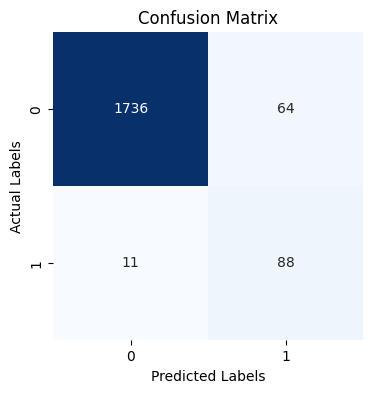

Accuracy: 0.9605055292259084
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1800
           1       0.58      0.89      0.70        99

    accuracy                           0.96      1899
   macro avg       0.79      0.93      0.84      1899
weighted avg       0.97      0.96      0.96      1899



In [139]:
# Random Undersampling
print("\nRandom Undersampling:")
random_us = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = random_us.fit_resample(X_train, y_train)
accuracy, report,cm = random_forest(X_resampled, y_resampled, X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**Adaptive Synthetic Sampling (ADASYN):**</span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; ADASYN is a technique for adaptability. It focuses on creating synthetic instances for the minority class based on the density of data points in the surrounding area. In other words, it focuses more on creating synthetic examples in areas where minorities are underrepresented.<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; ADASYN is useful in situations where standard oversampling approaches may be insufficient. It seeks to overcome the issue of overfitting that can occur when using classic oversampling approaches by adaptively producing synthetic examples.</span>

<img src="https://www.researchgate.net/profile/Mohammed-Nahas-2/publication/352392100/figure/fig2/AS:1041994696638465@1625442303601/The-use-of-ADASYN-to-balance-the-dataset-24-Weighted-SMOTEW-SMOTE.png" alt="ADASYN.png" width="500" height="150"><br>
<br>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Advantages:**<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Improved Model Performance<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Effective Handling of Imbalance<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Maintains Data Diversity<br>
    <br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 17px;">**Disadvantages:**<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Computationally Intensive<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Not Suitable for All Data<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Potential Data Anomalies can be generated<br>



ADASYN:


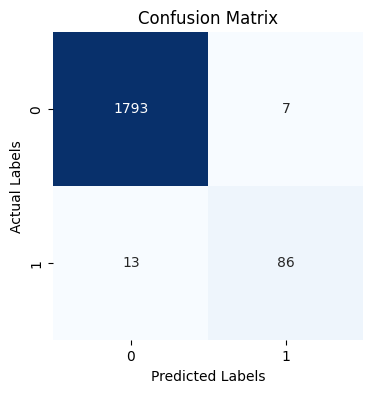

Accuracy: 0.989468141126909
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1800
           1       0.92      0.87      0.90        99

    accuracy                           0.99      1899
   macro avg       0.96      0.93      0.95      1899
weighted avg       0.99      0.99      0.99      1899



In [133]:
# ADASYN (Adaptive Synthetic Sampling)
print("\nADASYN:")
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
accuracy, report,cm = random_forest(X_resampled, y_resampled, X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**Conclusion:**</span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Original Data: The original dataset had a high number of true negatives (TN) and a few false negatives (FN), indicating a good balance between precision and recall. It achieved a high accuracy of 99.10%.<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Random Oversampling slightly increased the number of false positives (FP) while maintaining a similar number of true positives (TP) and true negatives (TN). It slightly reduced precision but improved recall for the minority class. The accuracy remained high at 99.05%.<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; SMOTE resulted in more false positives (FP) compared to Random Oversampling, with a small reduction in true negatives (TN). However, it improved precision and recall for the minority class. The accuracy remained high at 98.95%.<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Random Undersampling significantly reduced the number of true negatives (TN) and increased false positives (FP). While it improved recall for the minority class, it had a notable impact on accuracy, reducing it to 96.05%.<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; ADASYN had a similar impact on the confusion matrix as SMOTE, with a slightly lower number of false positives (FP) and true negatives (TN). It improved precision and recall for the minority class, resulting in an accuracy of 98.89%<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">To summarize, each technique has its own trade-offs in terms of precision, recall, and accuracy. Random Oversampling and SMOTE maintain high accuracy and improve recall for the minority class, while Random Undersampling and ADASYN prioritize recall but at the cost of lower accuracy and increased false positives. The choice of technique depends on your specific goals and the importance of precision and recall for your application.<br>
For the above example ADASYN technique works best as we get a good accuracy and also lower number of false positives and higher true negatives.</span>

## <span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">**References:**<br></span>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic minority over-sampling technique. Journal of Artificial Intelligence Research, 16, 321-357.<br>(https://www.jair.org/index.php/jair/article/view/10302)<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; Sun, Y., Wong, A. K., & Kamel, M. S. (2009). Classification of imbalanced data: A review. International Journal of Pattern Recognition and Artificial Intelligence, 23(4), 687-719.<br>(https://www.worldscientific.com/doi/abs/10.1142/S0218001409007326)<br></span>
<br>

<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; https://medium.com/@itbodhi/handling-imbalanced-data-sets-in-machine-learning-5e5f33c70163<br></span>
<br>
<span style="font-family: 'Times New Roman', Times, serif; font-size: 16.5px;">&bull; https://www.kaggle.com/search?q=credit+card+fraud<br></span>